## IE517 MLF F20
## Module 5 Homework (Dimensionality Reduction)

Yaxuan Wang (662869931)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import svm
from PIL import Image

In [3]:
df = pd.read_csv(r"C:\Users\Yaxuan Mandy Wang\Desktop\hw5_treasury_yield_curve_data.csv")
df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


## Part 1: Exploratory Data Analysis

#### Summary Statistics

In [4]:
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


#### Scatterplot matrix

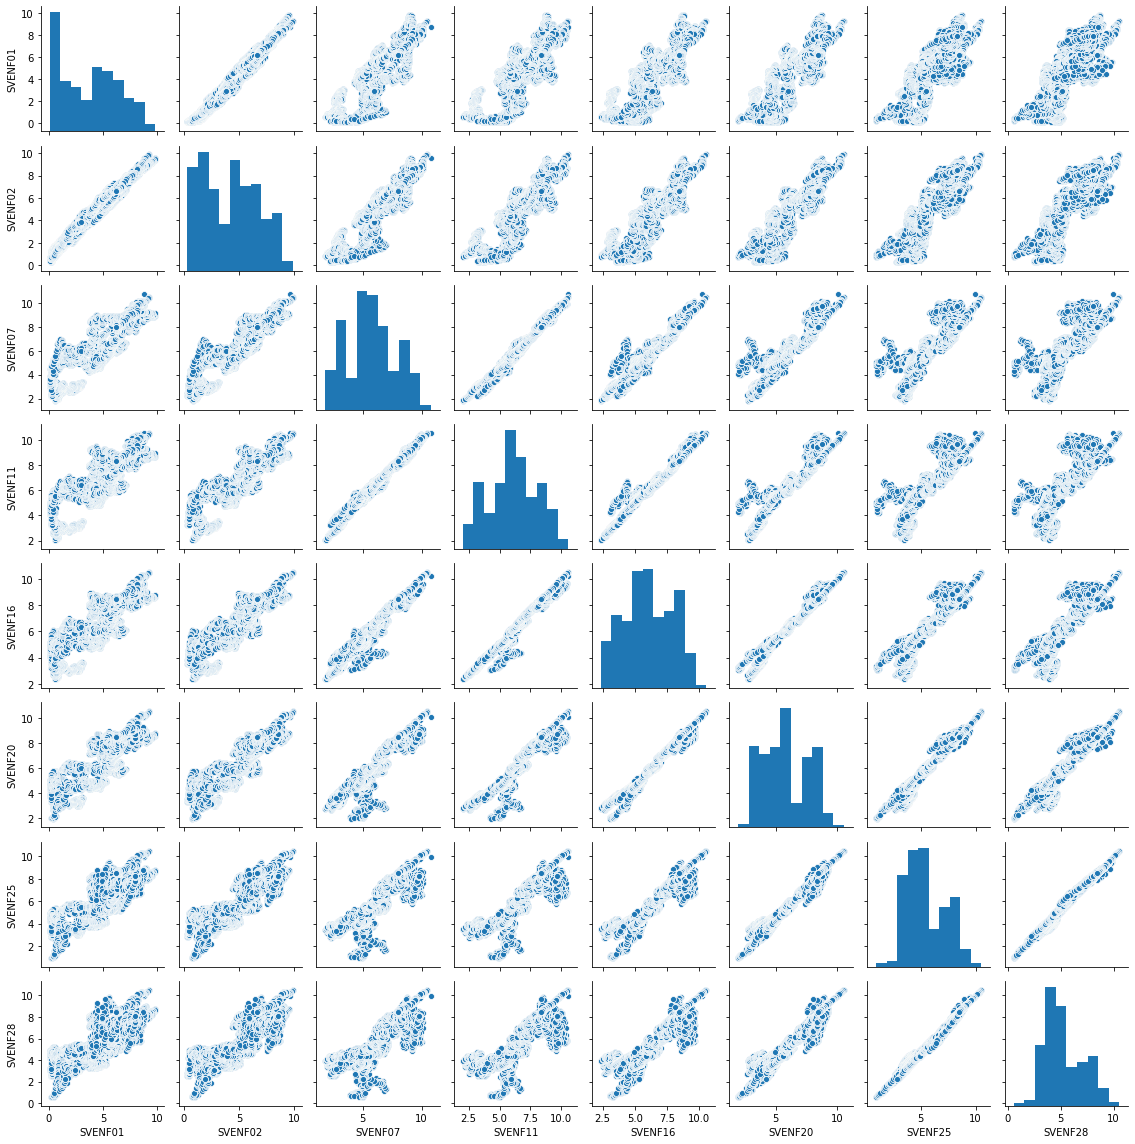

In [5]:
some_columns = ['SVENF01','SVENF02','SVENF07','SVENF11','SVENF16','SVENF20','SVENF25','SVENF28']

sns.pairplot(df[some_columns], height= 2)
plt.tight_layout()
plt.show()

As we can see from the scatter plot, there exists linear relationship among those variables, although some have noises. For example, apparently, the `SVENF25` has positive linear association with `SVENF28`. 

#### Heatmap/Correlation Matrix

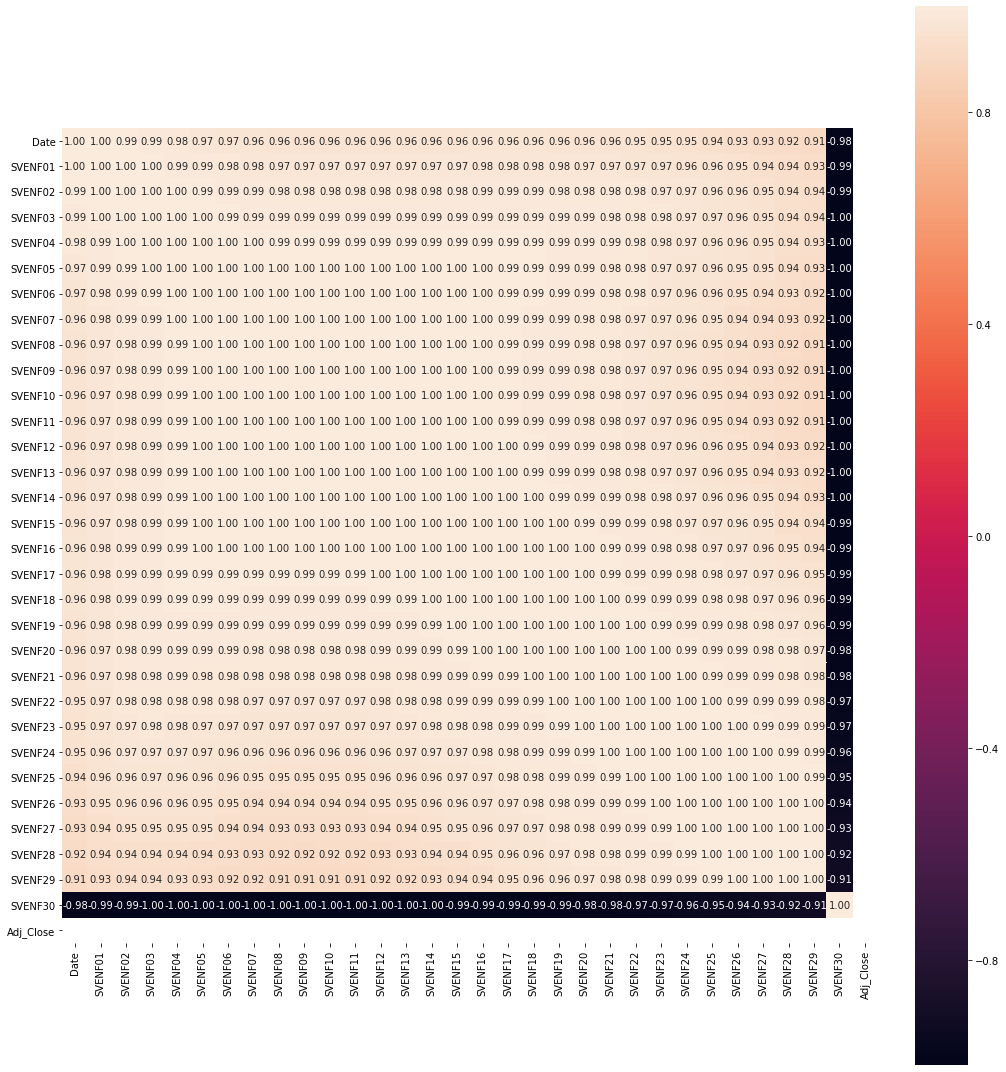

In [6]:
cm = np.corrcoef(df.corr())
#sns.set(font_scale=1.5)
plt.figure(figsize=(15, 15))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns,
                 xticklabels=df.columns)

bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

From the heatmap, there exists strong positive correlation among those `SVENF` variables. 

#### Split Data into Training and Testing Sets

In [7]:
del df['Date']
X = df.iloc[:, :-1].values
y = df['Adj_Close'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

Now in order to test and compare our model performance in next part, we are spliting data into training and test sets. I use 85% of the data for the training set and the rest of 15% as our testing set.

#### Standardized Data

In [8]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In order to perform PCA in the latter section, we need to normalize our data since PCA model is very senstive the feature scaling. 

## Part 2: Perform a PCA on the Treasury Yield dataset

#### Explained Variance Ratio for All Components

In [9]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
print("The explained variance ratio for all components are : \n", pca.explained_variance_ratio_)

The explained variance ratio for all components are : 
 [9.31796975e-01 4.07650756e-02 2.18438668e-02 4.85133058e-03
 6.63341250e-04 6.87379176e-05 9.48168675e-06 1.09876995e-06
 8.50910960e-08 6.74428451e-09 4.72621857e-10 3.80161775e-11
 9.30609065e-12 8.71811396e-12 8.59362280e-12 8.53519254e-12
 8.41818231e-12 8.32407041e-12 8.16475927e-12 8.12446450e-12
 7.94366171e-12 7.84486451e-12 7.70300119e-12 7.56475430e-12
 7.49445649e-12 7.39336209e-12 7.21415235e-12 6.93802195e-12
 6.58019099e-12 6.26023985e-12]


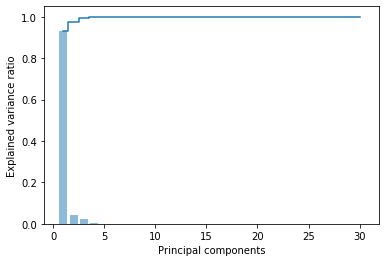

In [10]:
plt.bar(range(1, 31), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 31), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

From above, the first feature `SVENF01` has 0.93 varaince on the PCA model, which is a lot. And the second feature `SVENF02` has 0.04 explaiend variance ratio. Only the first feature are informative in this case. This is due to hifh correlation among attributes, which is verfied in heatmap. 

#### Explained Variance Ratio for n_components=3

In [11]:
pca = PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train_std)
print("The explained variance ratio for 3 components are : \n", pca.explained_variance_ratio_)

The explained variance ratio for 3 components are : 
 [0.93179697 0.04076508 0.02184387]


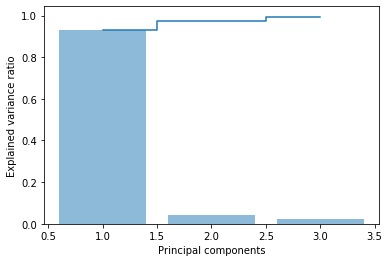

In [12]:
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

If we fit the PCA model on the first three principal components, we will have the first PC has up to 93% explained variance ratio, and the rest two has very small explained varaince ratio. This corresponds to the PCA model we fit on the all components. The first PC is most informative and important. 

The cumulative explained varaince will reach approximately to 1 after the 3 PC. 

## Part 3: Linear regression v. SVM regressor - baseline

### Part 3.1: Linear Regression on Original Dataset

#### The Fitted Model

In [13]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print(slr.coef_)

[  -4.83843828   53.15886154 -249.77609515  590.39765971 -686.96356431
  228.09887769  289.2937007  -302.62642323  -44.31624559  320.69207747
 -288.36927381  200.16366115   -0.89256855  -86.9401334   -96.64031266
   -7.50513023 -302.47703104  216.50764238  136.90241245  133.63875552
  562.97736489 -387.63320904  176.17955175 -418.55197044 -795.41172645
  238.76730551  102.69781344  839.17533861  -80.32795403 -336.50681657]


The above are the coefficients for this linear regression model. The first number -4.83843828 is our y-intercept when all x's are zero. The second number 53.15886154 are the coefficient for the explanatory variable `SVENF25`. And the rest numbers are coefficients for each features. 

#### Performance Metrices by MSE

In [14]:
print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

The MSE train: 0.603, test: 0.612


We can see that the Mean Squared Error (MSE) for the training set is 0.603, whilte the one for the testing set is 0.612, which is slightly bigger. That is acceptable. 

#### Performance Metrices by Coefficient of Determination

In [15]:
print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

The coefficient of determination train: 0.902, test: 0.904


The $R^2$ for both training set and test set are very high. The Linear regression model fits the original data very well. 

### Part 3.2: Linear Regression on PCA Transformed Dataset

In [16]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

slr = LinearRegression()
slr = slr.fit(X_train_pca, y_train)

y_train_pred = slr.predict(X_train_pca)
y_test_pred = slr.predict(X_test_pca)

print(slr.coef_)

[-0.42364406 -0.48646442  0.26559618]


The above are the coefficients for this linear regression model fitted on the PCA transformed data. The first number -0.42364406 is the coefficient for the first principal component. The second number -0.48646442 is the coefficient for the second principal component. And 0.26559618 is the coefficient for the third principal component

#### Performance Metrices by MSE

In [17]:
print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

The MSE train: 0.820, test: 0.854


The Mean Squared Error (MSE) for the training set is 0.820, whilte the one for the testing set is 0.854, which is slightly bigger.

#### Performance Metrices by Coefficient of Determination

In [18]:
print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

The coefficient of determination train: 0.867, test: 0.866


The $R^2$ for both training set and test set are high, around 0.87. The Linear regression model fits the original data very well. Also, the $R^2$ for the testing dataset is as the same high as the one for training dataset, so there is no overfitting or underfitting problems. 

### Part 3.3: SVM on Original Dataset

In [19]:
SVM = svm.SVR(kernel ='rbf', C=1, gamma = 'scale')
SVM.fit(X_train, y_train)
y_train_pred = SVM.predict(X_train)
y_test_pred = SVM.predict(X_test)

#### Performance Metrices by MSE

In [20]:
print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

The MSE train: 0.071, test: 0.070


The MSE for both training and testing dataset are very small. They are much smaller than the ones for linear regression models. 

#### Performance Metrices by Coefficient of Determination

In [21]:
print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

The coefficient of determination train: 0.988, test: 0.989


Both $R^2$ are very closed to 1. And the $R^2$ for testing dataset is even bigger, which is very accurate for prediction. 

### Part 3.4: SVM on PCA Transformed Dataset

In [22]:
SVM = svm.SVR(kernel ='rbf', C=1, gamma = 'scale')
SVM.fit(X_train_pca, y_train)
y_train_pred = SVM.predict(X_train_pca)
y_test_pred = SVM.predict(X_test_pca)

#### Performance Metrices by MSE

In [23]:
print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

The MSE train: 0.136, test: 0.143


#### Performance Metrices by Coefficient of Determination

In [24]:
print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

The coefficient of determination train: 0.978, test: 0.978


## Part 4: Conclusions

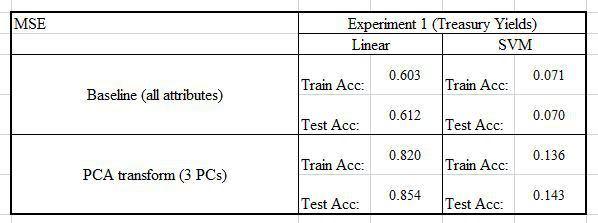

In [25]:
myImage = Image.open("MSE.jpg");
myImage

Choose MSE as our criteria:

On the untransformed data, SVM gives relatively lower MSE, so SVM is better for all attributes. On the PCA transformed data, the SVM also provides much lower MSE. Therefore, regardless transformed data or orginial data, SVM perfroms much better. 

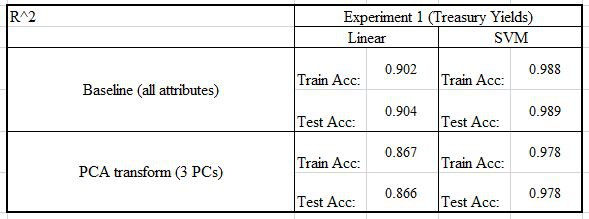

In [26]:
myImage = Image.open("R2.jpg");
myImage

Choose $R^2$ as our criteria:

On the untransformed data, SVM gives a bit higher $R^2$ than linear regression. However, both models gives the $R^2$ above 0.90, which means both models has fit the data very well. SVM is slight better. On the PCA transformed data, the SVM also provides a bit higher MSE. Therefore, overall SVM perfroms better. 

None of the transformation leads to the best performance increase. This might be because the PCA tranformation lose some important information. 

The SVM models has lower training time. 

## Part 5: Appendix

Link to github repo:

https://github.com/yaxuanw3/IE517_F20_HW5

In [27]:
print("My name is {Yaxuan Wang}")
print("My NetID is: {662869931}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Yaxuan Wang}
My NetID is: {662869931}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
